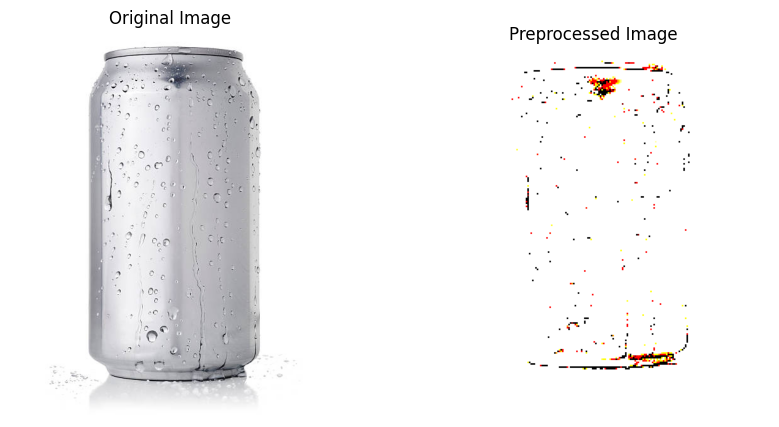

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predicited array [[8.7748230e-02 1.7802810e-03 6.1786130e-05 1.3994293e-02 2.2686168e-03
  5.5064261e-03 1.1903784e-01 2.6484665e-01 4.2937332e-01 1.1292784e-06
  7.2444871e-02 1.4866174e-03 5.8225571e-04 8.6769334e-04]]
metal
pred acc ROUND:  42.94
istockphoto-495144450-612x612.jpg: Your waste material is metal with 42.94% accuracy.
Our percentage of Accuracy is not high enough. We are not certain of the image you've provided. Please take another photo.


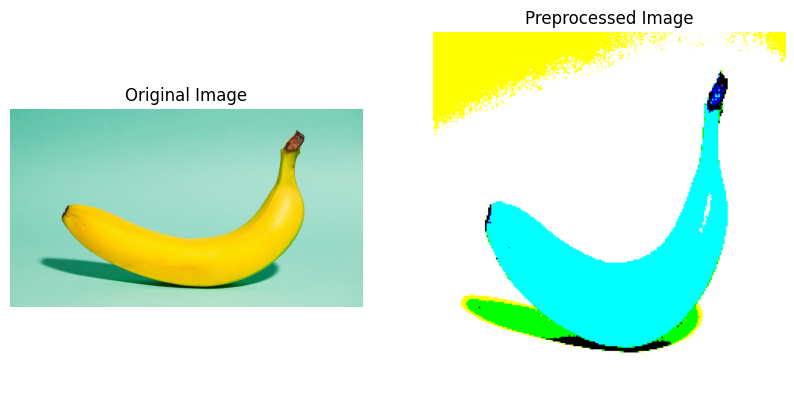

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicited array [[7.9558680e-09 9.9999881e-01 2.3499922e-09 5.6975376e-09 2.7412217e-09
  2.1345199e-09 2.4079313e-07 6.2445999e-08 2.5297298e-08 5.1039870e-09
  6.6323307e-09 7.7225576e-07 7.1501070e-08 5.0616018e-09]]
biological
pred acc ROUND:  100.0
how-many-calories-are-in-a-banana-1440x810.jpg: Your waste material is biological with 100.0% accuracy.
Your waste material is biological. Therefore, you should compost it.


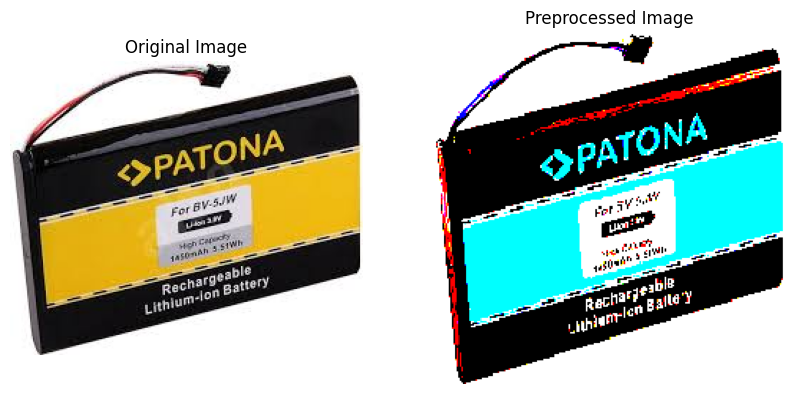

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicited array [[9.9997473e-01 1.9633013e-10 2.1444417e-05 1.9911641e-09 4.7162461e-12
  2.2641760e-07 3.3566017e-12 7.8196246e-07 9.1428429e-09 2.8677455e-06
  9.4836166e-09 6.2785306e-09 9.6580466e-11 2.1461611e-08]]
battery
pred acc ROUND:  100.0
battery_18.jpg: Your waste material is battery with 100.0% accuracy.
Your waste material is battery. Therefore, you should dispose of it at an e-waste facility.


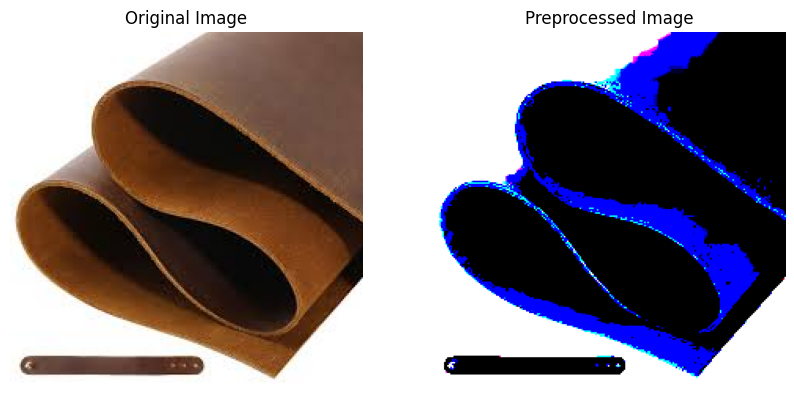

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicited array [[9.8388746e-06 1.9785271e-04 8.2531109e-02 1.7706200e-06 2.0668223e-09
  5.1383955e-05 9.3666295e-04 9.1377919e-04 1.3468279e-01 1.8475342e-01
  7.9152095e-08 5.9099162e-01 1.0369004e-07 4.9295630e-03]]
rubber
pred acc ROUND:  59.1
leather.jpeg: Your waste material is rubber with 59.1% accuracy.
Your waste material is rubber. Consider taking it to a special recycling or disposal facility.


In [3]:
import numpy as np
import os
from keras.preprocessing import image
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input

# Load the model

#Model  can be found from my other REPO: https://github.com/ria-bhandari/BinBudd_Hack_Davis24

modelPath = '/Users/BroBro/Desktop/please.keras'
vgg16 = load_model(modelPath)




output_class = ["battery", "biological", "cardboard", "cement", " clothes", "electronics", "glass", "leather", "metal","paper", "plastic", "rubber", "trash", "wood"]


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def plot_images(original, preprocessed):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Convert preprocessed image back to a displayable format
    preprocessed_display = np.clip(preprocessed[0] * 0.5 + 0.5, 0, 1)
    axs[1].imshow(preprocessed_display)
    axs[1].set_title('Preprocessed Image')
    axs[1].axis('off')
    plt.show()



#Reference: output_class = ["battery", "biological", "cardboard", "cement", " clothes", "electronics", "glass", "leather", "metal","paper", "plastic", "rubber", "trash", "wood"]


def predict_folder(folder_path):
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            original_image = Image.open(img_path)
            preprocessed_image = load_and_preprocess_image(img_path)
            plot_images(original_image, preprocessed_image)
            predicted_array = vgg16.predict(preprocessed_image)
            print("Predicited array", predicted_array)
            predicted_value = output_class[np.argmax(predicted_array)]
            print(predicted_value)
            
            predicted_accuracy = round(np.max(predicted_array) * 100, 2)
            print("pred acc ROUND: ", round(np.max(predicted_array) * 100, 2))
            print(f"{img_file}: Your waste material is {predicted_value} with {predicted_accuracy}% accuracy.")
            
            if round(np.max(predicted_array) * 100, 2) > 50: 

                if predicted_value in ["battery", "electronics"]:
                    print(f"Your waste material is {predicted_value}. Therefore, you should dispose of it at an e-waste facility.")
                elif predicted_value == "biological":
                    print(f"Your waste material is {predicted_value}. Therefore, you should compost it.")
                elif predicted_value == "cardboard":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "cement":
                    print(f"Your waste material is {predicted_value}. Therefore, it should be disposed of in construction waste.")
                elif predicted_value == "clothes":
                    print(f"Your waste material is {predicted_value}. Therefore, you should donate it or dispose of it in a textile recycling bin.")
                elif predicted_value == "glass":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "leather":
                    print(f"Your waste material is {predicted_value}. Consider donating it or using a special waste disposal service.")
                elif predicted_value == "metal":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "paper":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it.")
                elif predicted_value == "plastic":
                    print(f"Your waste material is {predicted_value}. Therefore, you should recycle it if it's recyclable or dispose of it properly.")
                elif predicted_value == "rubber":
                    print(f"Your waste material is {predicted_value}. Consider taking it to a special recycling or disposal facility.")
                elif predicted_value == "trash":
                    print(f"Your waste material is {predicted_value}. Unfortunately, this should go to the landfill.")
                elif predicted_value == "wood":
                    print(f"Your waste material is {predicted_value}. It can often be recycled or repurposed, depending on the condition.")

            else: 
                print("Our percentage of Accuracy is not high enough. We are not certain of the image you've provided. Please take another photo.")
                
                
                

# Example usage
folder_path = '/Users/BroBro/Desktop/Test'
predict_folder(folder_path)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import coremltools as ct

# Step 1: Load the Keras model from the .h5 file
model = load_model('/home/brody/BrodyCode/BinBud/BinBudPlease.h5')

# Step 2: Convert the Keras model to Core ML format using the correct input name
coreml_model = ct.convert(
    model,
    inputs=[ct.ImageType(name="input_3", shape=(1, 224, 224, 3), 
                         scale=1/255.0, 
                         bias=[-103.939, -116.779, -123.68])]
)

# Step 3: Save the Core ML model to a file
coreml_model.save('/home/brody/BrodyCode/BinBud/preprocessBinBud.mlpackage')

print("Model conversion complete. The Core ML model has been saved as 'BinBudPlease.mlmodel'.")


scikit-learn version 1.3.2 is not supported. Minimum required version: 0.17. Maximum required version: 1.1.2. Disabling scikit-learn conversion API.
TensorFlow version 2.16.1 has not been tested with coremltools. You may run into unexpected errors. TensorFlow 2.12.0 is the most recent version that has been tested.


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates